# Prueba Intertrimestral

Nombre y Apellidos: Eva Calvo-Sotelo

Tiempo de la prueba: 1h y 45 mins

Asignatura: Desarrollo de Aplicaciones para la Visualización de Datos

Fecha: 14 de octubre de 2024

Instrucciones:

- Herramientas Sugeridas: Python (pandas, matplotlib, seaborn, scikit-learn).

- Evaluación: Se valorará la capacidad para interpretar los resultados y la claridad en la exposición de las conclusiones.

- Materiales permitidos: Materiales de clase. Internet para búsqueda de dudas y documentación.

- Prohibido: Mingún tipo de LLM, ni mensajería instantánea.

- Formato de Entrega: Los estudiantes deben presentar su trabajo en formato de notebook (por ejemplo, Jupyter Notebook), con gráficos y explicaciones detalladas.

- Entrega: Subir .ipynb y PDF a Github. Enviar resultados al siguiente enlace. Para crear PDF: File -> Print -> Destination as PDF

## [Entrega aquí el examen](https://forms.gle/gU7aKkzE7didZpYV7)




Carga aquí las librerías que creas que vayas a utilizar:

In [98]:
import pandas as pd
import numpy as np
import sklearn.datasets
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    classification_report,
    confusion_matrix,
    silhouette_score
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression

from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation


# Ejercicio 1: Programación (2 puntos)

a) Crea una función que calcule y devuelva el valor de la iteración $n+1$ del mapa logístico dada la fórmula:

$x_{n+1}=r⋅x_n⋅(1−x_n)$

donde:

- $r$ es la tasa de crecimiento
- $x_n$ es el valor de la iteración anterior.

La función debe aceptar como parámetros $r$ y $x_n$ (valor inicial). (0.6 puntos)


In [131]:
def logisticmap(x_init, r):
    return r*x_init*(1-x_init)


b) Crea una función que genere una lista con las primeras n iteraciones del mapa logístico, utilizando la función anterior. (0.6 puntos)

In [132]:
def logisticmap_array(x_init, r, length):
    x = [logisticmap(x_init, r)]
    for i in range(length):
       x.append(r*x[-1]*(1-x[-1]))
    return np.array(x)

c) Guarda en un dataframe las iteraciones del mapa logístico, para $r = \{0, 0.25, 0.5, 0.75, \dots, 4\}$ y semilla $x_0 = 0.2$. El dataframe debe tener tres columnas: $r$, $n$ y $x_{n+1}$. Muestra los 10 primeros resultados (0.6 puntos)

In [133]:
data = logisticmap_array(0.25,2,100)


In [134]:
df = pd.DataFrame(data)
df

,0
0,0.375000
1,0.468750
2,0.498047
3,0.499992
4,0.500000
...,...
96,0.500000
97,0.500000
98,0.500000
99,0.500000


d) ¿Cómo se podría programar en una clase las dos funciones anteriores para calcular y almacenar iteraciones del mapa logístico? Proporciona la implementación de la clase con un método para obtener el valor de una iteración específica, otro método para generar la lista completa de iteraciones y otro para crear un gráfico que visualice el $r$ y $x_{n+1}$. (0.2 puntos)

In [135]:
class LogMap():
    
    def logisticmap(self, x_init, r):
        return r*x_init*(1-x_init)

    def logisticmap_array(self, x_init, r, length):
        x = [logisticmap(x_init, r)]
        for i in range(length):
            x.append(r*x[-1]*(1-x[-1]))
            return np.array(x)

# Ejercicio 2: Exploración y comprensión (3 puntos)

a) Describe las principales variables del dataset proporcionado. ¿Qué información aportan y qué tipo de datos contiene cada una? ¿Existen valores faltantes en el dataset? Si es así, ¿en qué variables? ¿Qué propones para resolverlo? (1 puntos)


In [32]:
def basicStats(df):
  print(df.shape)
  print(df.isna().sum())
  print(df.dtypes)
  print(df.describe(include='all'))

In [33]:
df = pd.read_csv('Walmart.csv', encoding='ISO-8859-1')
print(df.head())     

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [34]:
basicStats(df)

(6435, 8)
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    1
dtype: int64
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object
              Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
count   6435.000000        6435  6.435000e+03   6435.000000  6435.000000   
unique          NaN         143           NaN           NaN          NaN   
top             NaN  05-02-2010           NaN           NaN          NaN   
freq            NaN          45           NaN           NaN          NaN   
mean      23.000000         NaN  1.046965e+06      0.069930    60.663782   
std       12.988182         NaN  5.643666e+05      0.255049    18.444933   
min        1.000000         NaN  2.099862e+05      0.000000    -2.060000   
25%       12.000000

Hay un NA en unemployement, el cual eliminamos

In [37]:
df = df.dropna()
basicStats(df)

(6434, 8)
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object
              Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
count   6434.000000        6434  6.434000e+03   6434.000000  6434.000000   
unique          NaN         143           NaN           NaN          NaN   
top             NaN  05-02-2010           NaN           NaN          NaN   
freq            NaN          45           NaN           NaN          NaN   
mean      22.996581         NaN  1.047016e+06      0.069941    60.664434   
std       12.986295         NaN  5.643956e+05      0.255067    18.446292   
min        1.000000         NaN  2.099862e+05      0.000000    -2.060000   
25%       12.000000

In [41]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


b) Realiza un gráfico de barras que responda las siguientes preguntas. ¿Cuántas tiendas $Store$ están presentes en el dataset? ¿Cuál es la media de ventas semanales $Weekly Sales$ por tienda? ¿Qué tiendas tienen las ventas promedio más altas y más bajas? (1 puntos)



In [44]:
df.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6434.000000,6434,6.434000e+03,6434.000000,6434.000000,6434.000000,6434.000000,6434.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,05-02-2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
mean,22.996581,NaN,1.047016e+06,0.069941,60.664434,3.358512,171.575168,7.999047
std,12.986295,NaN,5.643956e+05,0.255067,18.446292,0.458992,39.358921,1.876012
min,1.000000,NaN,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,NaN,5.531677e+05,0.000000,47.445000,2.933000,131.735000,6.891000
50%,23.000000,NaN,9.608457e+05,0.000000,62.675000,3.445000,182.616521,7.874000
75%,34.000000,NaN,1.420282e+06,0.000000,74.945000,3.735000,212.745096,8.622000


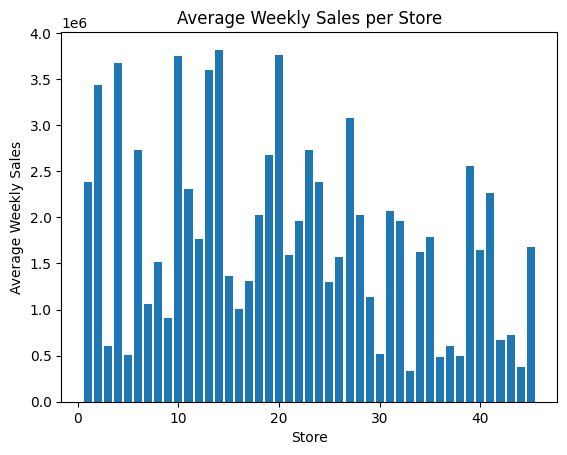

Ventas promedio más altas: 3818686.45
Ventas promedio más bajas: 209986.25
Ventas promedio: 1047015.9871899285
Num total de tiendas: 6434


In [87]:
store_sales = df.groupby('Store')['Weekly_Sales'].mean().reset_index()


plt.bar(df['Store'], df['Weekly_Sales'])
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales per Store')

plt.show()

print("Ventas promedio más altas:", df["Weekly_Sales"].max())
print("Ventas promedio más bajas:", df["Weekly_Sales"].min())
print("Ventas promedio:", df["Weekly_Sales"].mean())
print("Num total de tiendas:", df["Store"].count())


c) Genera un gráfico de líneas que muestre la evolución de las ventas semanales $Weekly Sales$ a lo largo del tiempo para la tienda con más ventas totales. ¿Observas algún patrón estacional o tendencia? (1 puntos)

In [139]:
store_total_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()
top_store = store_total_sales.loc[store_total_sales['Weekly_Sales'].idxmax()]['Store']

top_store_data = df[data['Store'] == top_store]

top_store_data['Date'] = pd.to_datetime(top_store_data['Date'], format='%d-%m-%Y')

top_store_data = top_store_data.sort_values('Date')

plt.figure(figsize=(12, 6))
plt.plot(top_store_data['Date'], top_store_data['Weekly_Sales'], color='blue')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title(f'Weekly Sales Over Time for Store {int(top_store)}')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


KeyError: 'Store'

In [96]:
valoresY = store_max_week_sales["Weekly_Sales"]
valoresX = store_max_week_sales["Date"]
fig, ax = plt.subplots()
plt.plot(valoresX, valoresY)
plt.show()

KeyError: 'Weekly_Sales'

# Ejrcicio 3: Análisis de Factores Externos (2 puntos)

a) Explora la relación entre el precio de combustible $Fuel Price$, la tasa de desempleo $Unemployment$ y las ventas semanales $Weekly Sales$. ¿Existe alguna correlación significativa? Genera dos gráficos de dispersión (scatter plot) para ilustrarlo. (1 puntos)

In [72]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df['Fuel_Price'], df['Unemployment'])
print(corr)


-0.034762458428959454


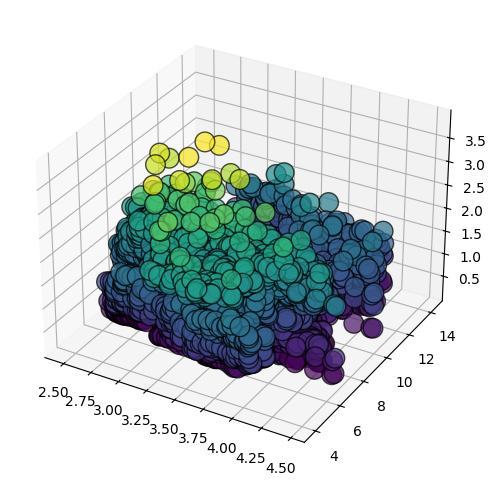

In [68]:

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter( df['Fuel_Price'], df['Unemployment'], df['Weekly_Sales'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=df['Weekly_Sales'])
plt.show()

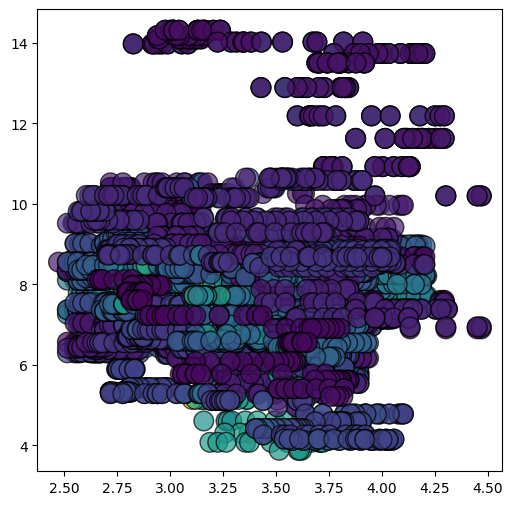

In [70]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(df['Fuel_Price'], df['Unemployment'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=df['Weekly_Sales'])
plt.show()

c) Compara las ventas promedio de las semanas festivas $Holiday Flag = 1$ con las semanas no festivas $Holiday Flag = 0$. ¿Cuál es la diferencia promedio de ventas entre estos dos tipos de semanas? ¿Existe una diferencia estdísticamente significativa? (1 puntos)


# Ejercicio 4: Modelado predictivo (2 puntos)

a) Encuentra el mejor modelo de regresión lineal para predecir las ventas semanales $Weekly Sales$ en función de las variables disponibles. Prueba múltiples combinaciones de variables. (1.5 puntos)


In [108]:
df = df.drop('Date', axis=1)
basicStats(df)

(6434, 7)
Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
Store             int64
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6434.000000  6.434000e+03   6434.000000  6434.000000  6434.000000   
mean     22.996581  1.047016e+06      0.069941    60.664434     3.358512   
std      12.986295  5.643956e+05      0.255067    18.446292     0.458992   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.531677e+05      0.000000    47.445000     2.933000   
50%      23.000000  9.608457e+05      0.000000    62.675000     3.445000   
75%      34.000000  1.420282e+06      0.000000    74.945000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000  

In [109]:
X = df.loc[:, df.columns!= 'Weekly_Sales'] 
y = df['Weekly_Sales']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

lm = Pipeline(steps=[
  ('scaler', StandardScaler()),
  ("lm", LinearRegression()),
])

lm = lm.fit(X_train, y_train)

print("Variance explanation R^2 = {}".format(round(lm.score(X, y),2)))

Variance explanation R^2 = 0.14


In [110]:
lmc = lm.named_steps['lm'].coef_

print(lmc)

# Plot for LM
objects = X.columns
y_pos = np.arange(len(objects))
coefficients = lmc

fig = go.Figure()

# Agrego las trazas necesarias
fig.add_trace(
    go.Bar(
        x = coefficients,
        y = objects,
        name = "Coeficientes",
        orientation='h'
    )
)

# Actualizo el diseño
fig.update_layout(title = "LM coefficients importance", xaxis_title = "Coeficientes", yaxis_title = "Variables")

# Muestro la figura
fig.show()

[-198737.01730099   14821.31424636  -15906.59998321    4711.52746355
  -91303.09160416  -40693.43432826]


b) Compara los modelos evalúando el R² y el error cuadrático medio (MSE). ¿Cuál es el modelo con mejores métricas? (0.5 puntos)


In [111]:
y_pred = lm.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 266826659971.09
Mean absolute error: 426688.62
Coefficient of determination: 0.15


# Ejercicio 5: Conclusiones y Recomendaciones (1 punto)

a) Redacta un informe de máximo 500 palabras resumiendo los principales hallazgos del análisis de datos y la modelización. Incluye tus conclusiones sobre qué factores influyen más en las ventas y recomendaciones para la empresa basadas en el análisis.